In [26]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [22]:
country_list={'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Denmark',
 'Estonia', 'Finland', 'France', 'Germany' ,'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 
 'Latvia', 'Lithuania', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovenia', 
 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey'}

In [3]:
df = pd.read_csv('COVID-19_vaccination_rates.csv') 
df=df.loc[(df["date"]=="2021-10-25")].loc[(df["location"].isin(country_list))] # select date and countries
df=df[["location","people_fully_vaccinated_per_hundred"]] # reduce to countries and percentage of vaccinated ppl
df.rename(columns={'location': 'Country Name'}, inplace=True)
df

,Country Name,people_fully_vaccinated_per_hundred
3869,Australia,61.01
4216,Austria,62.03
6449,Belgium,73.63
8779,Brazil,52.13
10691,Canada,73.73
12031,Chile,76.72
12684,Colombia,40.42
13655,Costa Rica,NaN
16024,Denmark,75.72
18716,Estonia,56.70


In [4]:
df0 = pd.read_csv('gdp_per_capita.csv') 
df0=df0.loc[(df0["Country Name"].isin(country_list))][["Country Name","2020"]] # select countries and reduce to gdp
df0.rename(columns={'2020': 'gdp_per_capita_2020'}, inplace=True)
df0

,Country Name,gdp_per_capita_2020
13,Australia,52397.387048
14,Austria,55648.874565
17,Belgium,52626.581638
29,Brazil,14829.890417
35,Canada,48090.992167
37,Switzerland,71760.586213
39,Chile,25067.691601
45,Colombia,14570.236743
48,Costa Rica,21143.342817
55,Germany,54263.649615


In [5]:
df1 = pd.read_csv('unemployment_rate.csv') 
df1 = df1.loc[(df1["Country Name"].isin(country_list))][["Country Name","2020"]] # select and reduce
df1.rename(columns={"2020": "unemplyment_2020"}, inplace=True)
df1

,Country Name,unemplyment_2020
13,Australia,6.61
14,Austria,5.77
17,Belgium,6.01
29,Brazil,13.67
35,Canada,9.48
37,Switzerland,4.94
39,Chile,11.51
45,Colombia,15.44
48,Costa Rica,17.08
55,Germany,4.31


In [6]:
df2 = pd.read_csv('political_regime.csv')   ## we only have democracy anyways... Not enough data for not else
df2 = df2.loc[(df2["Country"].isin(country_list))]
df2 = df2.loc[(True==pd.isnull(df2["end yr"]))][["Country","Regime type"]]
#df2 = df2.rename(columns={"Country": "Country "}, inplace=True)
df2

,Country,Regime type
24,Australia,democracy
25,Austria,democracy
37,Belgium,democracy
62,Brazil,democracy
83,Canada,democracy
103,Colombia,democracy
114,Costa Rica,democracy
123,Denmark,democracy
146,Estonia,democracy
150,Finland,democracy


In [7]:
df3 = pd.read_csv('trust_in_government.csv')  
df3 = df3.loc[(df3["TIME"]==2019)][["LOCATION","Value"]]
df3.rename(columns={"Value": "trust_ingovernment_2019"}, inplace=True)
#df3 = df3.loc[(df3["LOCATION"].isin(country_list))] ##select countries
df3

,LOCATION,trust_ingovernment_2019
12,AUS,46.870001
26,AUT,51.233826
40,BEL,32.790115
55,CAN,54.928097
83,DNK,63.299903
96,FIN,63.918815
111,FRA,38.184924
126,DEU,56.846043
140,GRC,39.642462
154,HUN,48.393419


In [8]:
df4 = pd.read_csv('secondary_education.csv')  
df4 = df4.loc[(df4["TIME"]==2019)].loc[(df4["SUBJECT"]=="UPPSRY")][["LOCATION","Value"]]
#df4 = df4.loc[(df4["Country Name"].isin(country_list))][["LOCATION","2019"]] # select countries
#df4 = df4.loc[(df4["LOCATION"].isin(country_list))][["LOCATION","2019"]]
df4.rename(columns={"Value": "secondary_education_2019"}, inplace=True)
df4

,LOCATION,secondary_education_2019
9,AUT,77.636
33,BEL,77.047
50,CAN,84.317
79,CZE,80.510
104,DNK,81.629
137,FIN,84.907
164,DEU,73.092
180,GRC,91.409
203,HUN,77.257
232,ISL,80.011


In [9]:
df5 = pd.read_csv('tertiary_education.csv')[["LOCATION","SUBJECT", "TIME", "Value"]]
df5 = df5.loc[(df5["TIME"]==2019)].loc[(df5["SUBJECT"]=="BACHR_MEN")|(df5["SUBJECT"]=="BACHR_WOMEN")]
df5.rename(columns={"TIME": "tertiary_education_2019"}, inplace=True)

#df5 = df5.loc[(df5["Country Name"].isin(country_list))][["Country Name","TIME"]]  # select countries
df5 = df5.pivot(index="LOCATION", columns="SUBJECT", values="Value")
df5['tertiary_education_2019'] = df5["BACHR_MEN"] + df5['BACHR_WOMEN']
df5 = df5["tertiary_education_2019"].to_frame()
df5 = df5.reset_index()  
df5

,LOCATION,tertiary_education_2019
0,AUS,69.343
1,AUT,37.418
2,BEL,80.736
3,CHE,72.556
4,CHL,52.185
5,CZE,50.212
6,DEU,64.156
7,DNK,81.471
8,ESP,63.931
9,EST,54.380


In [10]:
df6 = pd.read_csv('worldwide_covid_data.csv')                                 
df6.rename(columns={"Country": "Country Name"}, inplace=True)
df6 = df6.loc[(df6["Country Name"].isin(country_list))][["Country Name","Deaths/1M population"]]
df6

,Country Name,Deaths/1M population
9,Australia,71
10,Austria,1273
17,Belgium,2247
25,Brazil,2842
33,Canada,765
37,Chile,1959
39,Colombia,2472
42,Costa Rica,1391
48,Denmark,471
58,Estonia,1222


In [11]:
data1 = pd.merge(df, df0, on="Country Name")
data1 = pd.merge(data1, df1, on="Country Name")
#data = pd.merge(data, df2, on="Country Name")  ## sowieso alles Demokratien
data1 = pd.merge(data1, df6, on="Country Name")

data1

,Country Name,people_fully_vaccinated_per_hundred,gdp_per_capita_2020,unemplyment_2020,Deaths/1M population
0,Australia,61.01,52397.387048,6.61,71
1,Austria,62.03,55648.874565,5.77,1273
2,Belgium,73.63,52626.581638,6.01,2247
3,Brazil,52.13,14829.890417,13.67,2842
4,Canada,73.73,48090.992167,9.48,765
5,Chile,76.72,25067.691601,11.51,1959
6,Colombia,40.42,14570.236743,15.44,2472
7,Costa Rica,NaN,21143.342817,17.08,1391
8,Denmark,75.72,60551.640172,5.66,471
9,Estonia,56.70,37925.116799,6.46,1222


In [12]:
data2 = pd.merge(df3, df4, on="LOCATION")
data2 = pd.merge(data2, df5, on="LOCATION")

data2

,LOCATION,trust_ingovernment_2019,secondary_education_2019,tertiary_education_2019
0,AUT,51.233826,77.636,37.418
1,BEL,32.790115,77.047,80.736
2,DNK,63.299903,81.629,81.471
3,FIN,63.918815,84.907,72.916
4,DEU,56.846043,73.092,64.156
5,GRC,39.642462,91.409,75.157
6,HUN,48.393419,77.257,37.610
7,ISL,52.137706,80.011,64.937
8,ITA,22.192586,89.629,59.015
9,LUX,78.017101,72.229,11.467


In [13]:
df7 = pd.read_csv('betterlifeindex_2019.csv')  
df7.rename(columns={"Country": "Country Name"}, inplace=True)
df7 = df7[["LOCATION", "Country Name","Indicator", "Value"]].loc[(df7["Inequality"]=="Total")]
df8 = df7.loc[(df7["Indicator"]=="Life expectancy")][["Country Name", "LOCATION", "Value"]]
df8.rename(columns={"Value": "Life_expectancy_2019"}, inplace=True)
df9 = df7.loc[(df7["Indicator"]=="Homicide rate")][["Country Name", "LOCATION", "Value"]]
df9.rename(columns={"Value": "Homicide_rate_2019"}, inplace=True)
df10 = df7.loc[(df7["Indicator"]=="Life satisfaction")][["Country Name", "LOCATION", "Value"]]
df10.rename(columns={"Value": "Life satisfaction_2019"}, inplace=True)
df11 = df7.loc[(df7["Indicator"]=="Employees working very long hours")][["Country Name", "LOCATION", "Value"]]
df11.rename(columns={"Value": "Employees_working_hours_2019"}, inplace=True)
df12 = df7.loc[(df7["Indicator"]=="Time devoted to leisure and personal care")][["Country Name", "LOCATION", "Value"]]
df12.rename(columns={"Value": "leisure_and_personal_care_2019"}, inplace=True)
df13 = df7.loc[(df7["Indicator"]=="Voter turnout")][["Country Name", "LOCATION", "Value"]]
df13.rename(columns={"Value": "Voter_turnout_2019"}, inplace=True)
df7 = df7.loc[(df7["Indicator"]=="Self-reported health")][["Country Name", "LOCATION", "Value"]]
df7.rename(columns={"Value": "Self-reported_health_2019"}, inplace=True)
df7

,Country Name,LOCATION,Self-reported_health_2019
1636,Australia,AUS,85.0
1637,Austria,AUT,70.0
1638,Belgium,BEL,74.0
1639,Canada,CAN,88.0
1640,Czech Republic,CZE,60.0
1641,Denmark,DNK,71.0
1642,Finland,FIN,70.0
1643,France,FRA,66.0
1644,Germany,DEU,65.0
1645,Greece,GRC,74.0


In [34]:
data3 = pd.merge(df7, df8, on=["LOCATION","Country Name"])
data3 = pd.merge(data3, df9, on=["LOCATION","Country Name"])
data3 = pd.merge(data3, df10, on=["LOCATION","Country Name"])
data3 = pd.merge(data3, df11, on=["LOCATION","Country Name"])
data3 = pd.merge(data3, df12, on=["LOCATION","Country Name"])
data3.reset_index()

,index,Country Name,LOCATION,Self-reported_health_2019,Life_expectancy_2019,Homicide_rate_2019,Life satisfaction_2019,Employees_working_hours_2019,leisure_and_personal_care_2019
0,0,Australia,AUS,85.0,82.5,1.1,7.3,13.04,14.35
1,1,Austria,AUT,70.0,81.7,0.5,7.1,6.66,14.55
2,2,Belgium,BEL,74.0,81.5,1.0,6.9,4.75,15.70
3,3,Canada,CAN,88.0,81.9,1.3,7.4,3.69,14.56
4,4,Denmark,DNK,71.0,80.9,0.6,7.6,2.34,15.87
5,5,Finland,FIN,70.0,81.5,1.3,7.6,3.81,15.17
6,6,France,FRA,66.0,82.4,0.5,6.5,7.67,16.36
7,7,Germany,DEU,65.0,81.1,0.5,7.0,4.26,15.62
8,8,Italy,ITA,71.0,83.3,0.6,6.0,4.11,16.47
9,9,New Zealand,NZL,88.0,81.7,1.3,7.3,15.11,14.87


In [35]:
data = pd.merge(data1, data3, on=["Country Name"])
data = pd.merge(data2, data, on=["LOCATION"])
data=data.drop(columns=["Country Name","LOCATION","leisure_and_personal_care_2019"])
data
data=data.drop([9])

X = data[['trust_ingovernment_2019','secondary_education_2019','tertiary_education_2019','gdp_per_capita_2020','unemplyment_2020','Deaths/1M population','Self-reported_health_2019','Life_expectancy_2019','Employees_working_hours_2019']]
Y = data["people_fully_vaccinated_per_hundred"]
X

,trust_ingovernment_2019,secondary_education_2019,tertiary_education_2019,gdp_per_capita_2020,unemplyment_2020,Deaths/1M population,Self-reported_health_2019,Life_expectancy_2019,Employees_working_hours_2019
0,51.233826,77.636,37.418,55648.874565,5.77,1273,70.0,81.7,6.66
1,32.790115,77.047,80.736,52626.581638,6.01,2247,74.0,81.5,4.75
2,63.299903,81.629,81.471,60551.640172,5.66,471,71.0,80.9,2.34
3,63.918815,84.907,72.916,50810.527408,7.83,218,70.0,81.5,3.81
4,56.846043,73.092,64.156,54263.649615,4.31,1157,65.0,81.1,4.26
5,22.192586,89.629,59.015,41890.208794,9.31,2196,71.0,83.3,4.11
6,67.520084,85.911,61.803,44212.876475,4.55,6,88.0,81.7,15.11
7,59.798701,83.578,75.057,63287.607008,4.62,169,77.0,82.5,2.93
8,36.778586,74.744,63.931,38343.155224,15.67,1872,72.0,83.4,4.01
10,56.126091,76.235,60.084,28113.736584,13.92,847,69.0,78.0,32.64


In [36]:
X_new = SelectKBest(f_regression, k=2).fit(X, Y)
dfscores = pd.DataFrame(X_new.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                          Specs     Score
7          Life_expectancy_2019  9.376653
3           gdp_per_capita_2020  3.921015
2       tertiary_education_2019  3.397922
6     Self-reported_health_2019  2.693497
8  Employees_working_hours_2019  1.218086
1      secondary_education_2019  1.036412
4              unemplyment_2020  0.587241
0       trust_ingovernment_2019  0.017243
5          Deaths/1M population  0.002391


In [37]:
X_new = SelectKBest(mutual_info_regression, k=2).fit(X, Y)
dfscores = pd.DataFrame(X_new.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                          Specs     Score
3           gdp_per_capita_2020  0.208156
2       tertiary_education_2019  0.187335
6     Self-reported_health_2019  0.168382
0       trust_ingovernment_2019  0.017557
1      secondary_education_2019  0.000000
4              unemplyment_2020  0.000000
5          Deaths/1M population  0.000000
7          Life_expectancy_2019  0.000000
8  Employees_working_hours_2019  0.000000


[0.0508942  0.04655171 0.13922101 0.13947031 0.11002945 0.02518659
 0.16075693 0.24625251 0.08163729]


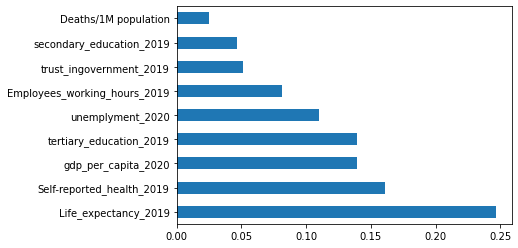

In [33]:

model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()